In [58]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import pickle

#Read the data set
data = pd.read_csv('flight_price_prediction.csv', index_col=0)
df = pd.DataFrame(data)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


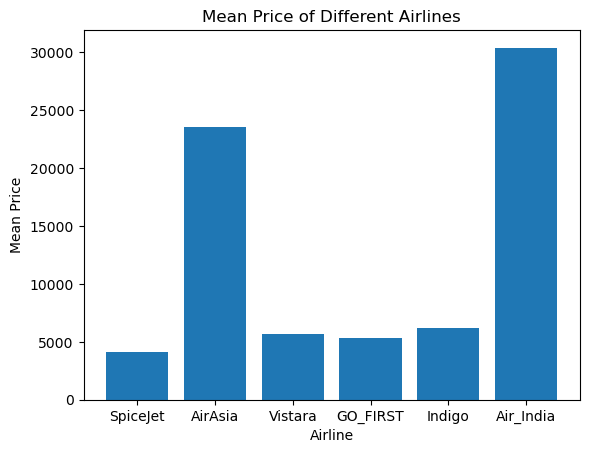

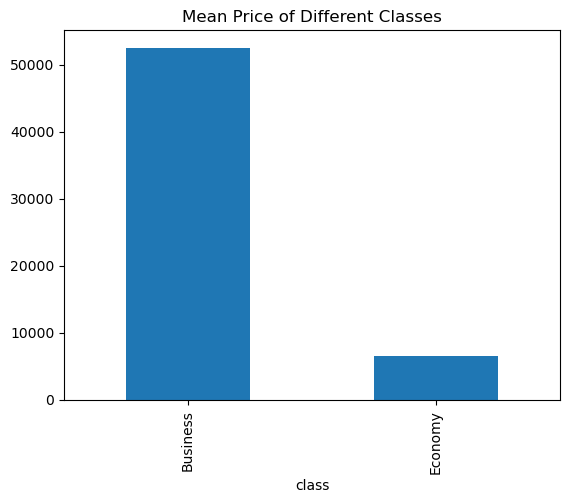

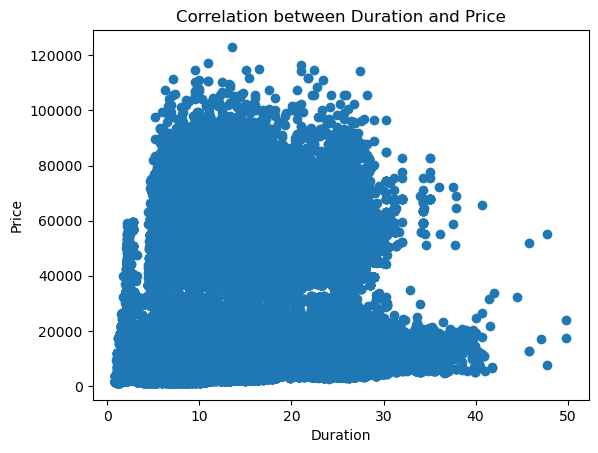

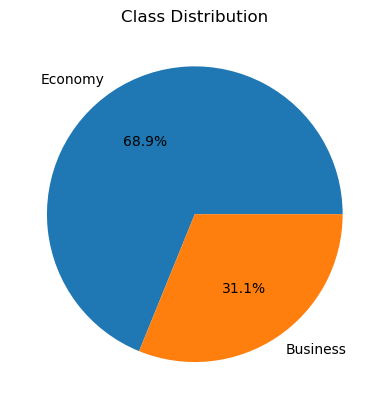

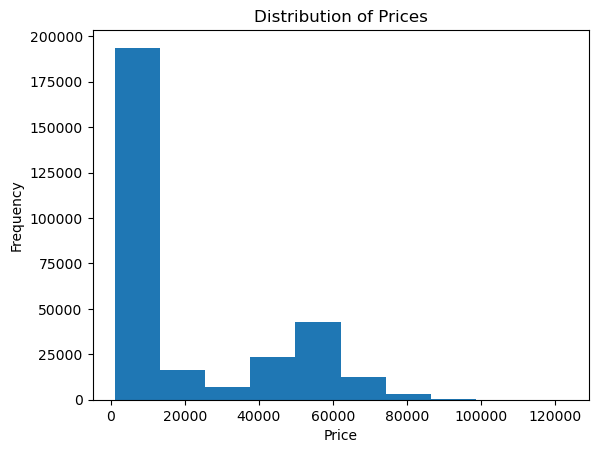

In [59]:
#Bar graph to visualize the mean price of different airlines
plt.bar(df['airline'].unique(), df.groupby('airline')['price'].mean())
plt.xlabel('Airline')
plt.ylabel('Mean Price')
plt.title('Mean Price of Different Airlines')
plt.show()

#Line graph to visualize the mean price of different classes
df.groupby('class').price.mean().plot(kind='bar')
plt.title('Mean Price of Different Classes')
plt.show()

#Scatter plot to visualize the correlation between duration and price
plt.scatter(df['duration'], df['price'])
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Correlation between Duration and Price')
plt.show()

#Pie graph for class distribution
classes = df['class'].value_counts()
plt.pie(classes, autopct="%1.1f%%", labels=classes.index.tolist())
plt.title("Class Distribution")
plt.show()

#Distribution of prices
plt.hist(df['price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [60]:
airline = df["airline"].unique()
airline_dict = {}
for i, airline_name in enumerate(airline):
    airline_dict[airline_name] = i

flight = df["flight"].unique()
flight_dict = {}
for i, flight_name in enumerate(flight):
    flight_dict[flight_name] = i

source_city = df["source_city"].unique()
source_city_dict = {}
for i, city_name in enumerate(source_city):
    source_city_dict[city_name] = i

departure_time = df["departure_time"].unique()
departure_time_dict = {}
for i, time in enumerate(departure_time):
    departure_time_dict[time] = i

stops = df["stops"].unique()
stops_dict = {}
for i, stop in enumerate(stops):
    stops_dict[stop] = i

arrival_time = df["arrival_time"].unique()
arrival_time_dict = {}
for i, time in enumerate(arrival_time):
    arrival_time_dict[time] = i

destination_city = df["destination_city"].unique()
destination_city_dict = {}
for i, city_name in enumerate(destination_city):
    destination_city_dict[city_name] = i

flight_class = df["class"].unique()
flight_class_dict = {}
for i, class_type in enumerate(flight_class):
    flight_class_dict[class_type] = i
    
df["airline"]=df["airline"].map(airline_dict)
df["flight"]=df["flight"].map(flight_dict)
df["source_city"]=df["source_city"].map(source_city_dict)
df["departure_time"]=df["departure_time"].map(departure_time_dict)
df["stops"]=df["stops"].map(stops_dict)
df["arrival_time"]=df["arrival_time"].map(arrival_time_dict)
df["destination_city"]=df["destination_city"].map(destination_city_dict)
df["class"]=df["class"].map(flight_class_dict)

In [61]:
def normalize(df,column_name):
    df[column_name]=(df[column_name]-df[column_name].min())/(df[column_name].max()-df[column_name].min())
    df[column_name]=df[column_name].round(decimals=4)

In [62]:
normalize(df,"duration")
normalize(df,"days_left")
normalize(df,"price")
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,0,0,0,0,0,0,0,0.0273,0.0,0.0397
1,0,1,0,1,0,1,0,0,0.0306,0.0,0.0397
2,1,2,0,1,0,2,0,0,0.0273,0.0,0.0398
3,2,3,0,2,0,3,0,0,0.0290,0.0,0.0398
4,2,4,0,2,0,1,0,0,0.0306,0.0,0.0398
...,...,...,...,...,...,...,...,...,...,...,...
300148,2,1457,5,2,1,4,3,1,0.1888,1.0,0.5588
300149,2,1461,5,3,1,0,3,1,0.1957,1.0,0.6231
300150,2,1437,5,1,1,0,3,1,0.2653,1.0,0.6395
300151,2,1462,5,1,1,4,3,1,0.1871,1.0,0.6599


In [63]:
X=df[["airline","flight","source_city","departure_time","stops","arrival_time","destination_city","class","duration","days_left"]]
Y=df[["price"]]
X_matrix=X.values
Y_matrix=Y.values
X_train = X_matrix[:int(0.8*len(X_matrix))]
Y_train = Y_matrix[:int(0.8*len(Y_matrix))]
X_test = X_matrix[int(0.8*len(X_matrix)):]
Y_test = Y_matrix[int(0.8*len(Y_matrix)):]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(240122, 10)
(240122, 1)
(60031, 10)
(60031, 1)


In [64]:
def OLS(X_train,Y_train):
    X_train_transpose=np.transpose(X_train)
    W=np.matmul(X_train_transpose,X_train)
    W_inverse=np.linalg.inv(W)
    weights=np.matmul(np.matmul(W_inverse,X_train_transpose),Y_train)
    return weights

In [102]:
def loss(x,y,w):
    xw=np.matmul(x,w)
    res=np.matmul(np.transpose(y-xw),(y-xw))
    return res

In [103]:
weights=OLS(X_train,Y_train)
pickle.dump(weights, open("kartikec_dasibbli_assignment1_part2.pickle", 'wb'))
print(weights)

[[-7.62053130e-04]
 [ 2.14798611e-05]
 [-3.43787964e-03]
 [ 1.68099121e-03]
 [ 4.34303348e-02]
 [ 1.39502707e-03]
 [ 4.89160743e-04]
 [ 3.66734630e-01]
 [ 4.44279847e-02]
 [-4.23789342e-02]]


In [104]:
lost= loss(X_train,Y_train,weights)
loss_sum=0
for i in range(len(Y_train)):
    loss_sum+=lost
    
total_loss= .5*loss_sum
print(total_loss)

[[61139229.00357646]]


In [105]:
def MSE(X_test,Y_test,weights):
    mse=0
    weightsT = np.transpose(weights)
    for i in range(len(X_test)):
        mse += (Y_test[i] - np.matmul(weightsT,X_test[i]))**2
    return mse/len(X_test)

In [106]:
mse = (MSE(X_train,Y_train,weights))
print(mse)

[0.00212073]


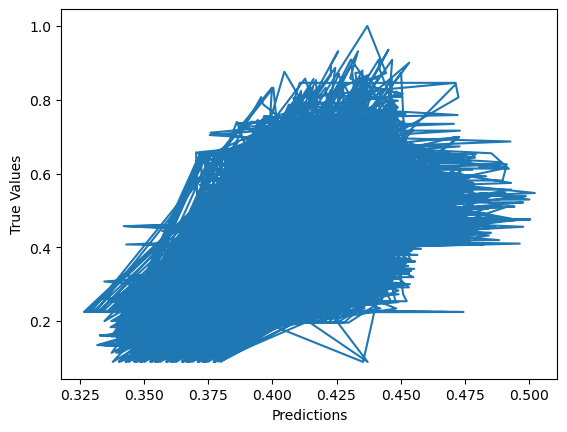

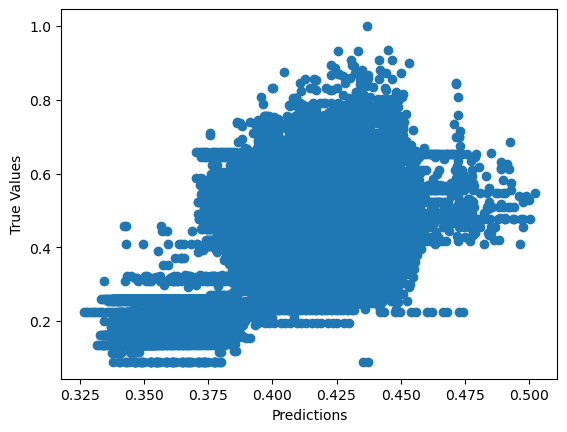

In [137]:
weightsT = np.transpose(weights)
pred = []
for i in range(len(X_test)):
    pred.append(np.matmul(weightsT,X_test[i]))
plt.plot(pred,Y_test)
plt.ylabel("True Values")
plt.xlabel("Predictions")
plt.show()

plt.scatter(pred,Y_test)
plt.ylabel("True Values")
plt.xlabel("Predictions")
plt.show()

In [138]:
def OLSridge_regression(X_train,Y_train,Lamda):
    X_train_transpose=np.transpose(X_train)
    W=np.matmul(X_train_transpose,X_train)
    W_inverse=np.linalg.inv(W+Lamda*np.identity(len(X_train[0])))
    weights=np.matmul(np.matmul(W_inverse,X_train_transpose),Y_train)
    return weights

In [150]:
lamb = 1
weightsRR = OLSridge_regression(X_train,Y_train,lamb)
pickle.dump(weightsRR, open("kartikec_dasibbli_assignment1_part3.pickle", 'wb'))
print(weightsRR)

[[-7.61512765e-04]
 [ 2.14761240e-05]
 [-3.43777555e-03]
 [ 1.68122526e-03]
 [ 4.34313232e-02]
 [ 1.39514903e-03]
 [ 4.89326322e-04]
 [ 3.66720691e-01]
 [ 4.44226021e-02]
 [-4.23754773e-02]]


In [151]:
def ridge_loss(x,y,w,l):
    xw=np.matmul(x,w)
    res=np.matmul(np.transpose(y-xw),(y-xw))+.5*l*np.matmul(np.transpose(w),w)
    return res

In [152]:
r_loss= ridge_loss(X_train,Y_train,weightsRR,lamb)
rloss_sum=0
for i in range(len(Y_train)):
    rloss_sum+=r_loss
    
rtotal_loss= .5*rloss_sum
print(rtotal_loss)

[[61147643.34148684]]


In [153]:
def MSEridge_regression(X_test,Y_test,weights,lamda):
    mse=0
    weightsT = np.transpose(weights)
    for i in range(len(X_test)):
        mse += np.matmul(np.transpose(Y_test[i] - np.matmul(X_test[i],weights)),(Y_test[i] - np.matmul(X_test[i],weights)))
    mse = mse*0.5
    mse = mse + (lamda/2)*np.matmul(weightsT,weights)
    return mse

In [154]:
mseRR = MSEridge_regression(X_test,Y_test,weights,lamb)
print(mseRR)

[[276.23836672]]


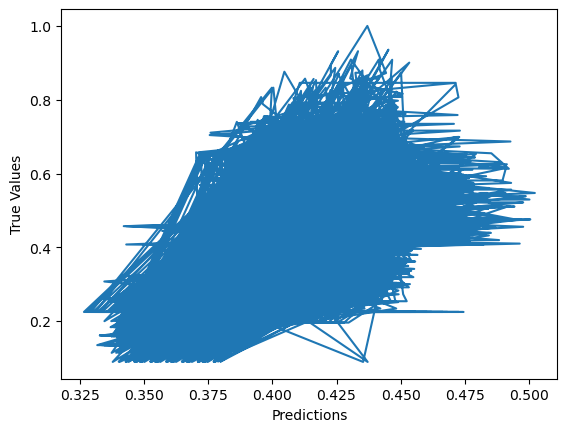

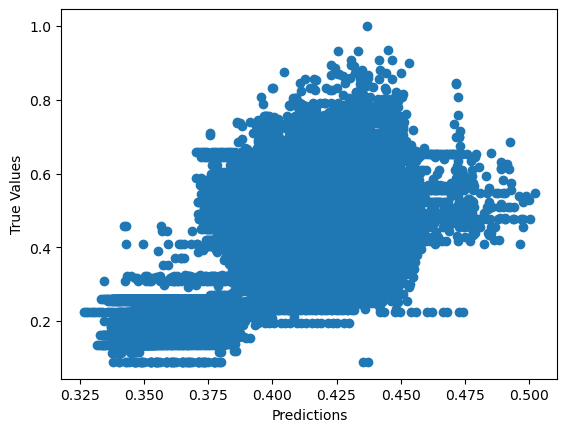

In [155]:
pred = []
weightsRRT = np.transpose(weightsRR)
for i in range(len(X_test)):
    pred.append(np.matmul(weightsRRT,X_test[i]))
plt.plot(pred,Y_test)
plt.ylabel("True Values")
plt.xlabel("Predictions")
plt.show()

plt.scatter(pred,Y_test)
plt.ylabel("True Values")
plt.xlabel("Predictions")
plt.show()